# Frequency and Graphs

In this section we will see the of occuring an event with the help of table and graphs like barplot and histogram.

In this we will use Pizza devilery time data.

In [8]:
# since our dataset are stored in a csv file so we need to specify the sep as a ','.
pizzadata = read.table(file="pizza_delivery.csv", sep=',', header=TRUE)


In [9]:
# checking the head of the data.
head(pizzadata)

day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
Thursday,01-May-14,35.12837,Laura,East,Bruno,68.28772,58.4,4,0,0,1
Thursday,01-May-14,25.20307,Melissa,East,Salvatore,70.99779,26.4,2,0,0,0
Thursday,01-May-14,45.64340,Melissa,West,Salvatore,53.39415,58.1,3,1,0,0
Thursday,01-May-14,29.37430,Melissa,East,Salvatore,70.30660,35.2,3,0,0,0
Thursday,01-May-14,29.99461,Melissa,West,Salvatore,71.50169,38.4,2,0,0,0
Thursday,01-May-14,40.25432,Melissa,Centre,Bruno,60.75950,61.8,4,1,1,0


Now here we can check the frequency of delivery of pizza in each branch or frequency of pizza delivered by a driver.

**Task: 1 Show the frequency of pizza delivery by each barach.**

**Task: 2 show the frequency of pizza delivery by each driver.**

___

**Task: 1**

In [13]:
# in this we can plot a histgram or we can plot a barplot, since we have low number of catefories in branch so we will use barplot.
# plotting a barplot by using branch variable.
# in this first we need to get the frequency of the data by using the table function and then we will put these frequency into the 
# barplot function.

# getting frequency
pizzafreq_by_branch = table(pizzadata$branch)

# checking the table output
pizzafreq_by_branch


Centre   East   West 
   421    410    435 

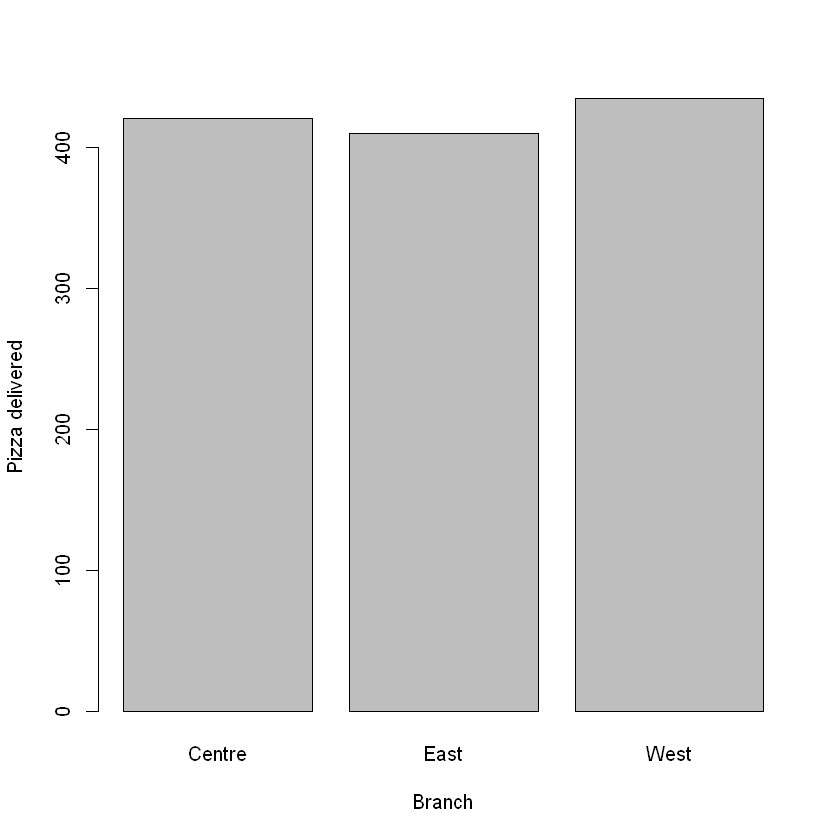

In [17]:
# Now we will plot a barplot.
barplot(pizzafreq_by_branch, xlab='Branch', ylab='Pizza delivered')

As you can see that now we have a nice graph which is showing the frequency of the pizza delivery by each branch. by this graph we can conculude that which brach is doing better than other braches, but according to the garaph all branches are doing good since they have delivered about to 400 pizza in a given time interval.


Here the next task we can check that how many pizza is delivered by each driver.

**Task 2**

In [19]:
# Now we will see that frequency of pizza delivery by each driver.
# first we need to calculate the frequency of the pizza by per driver by using table funciton.

pizzafreq_by_driver = table(pizzadata$driver)

In [21]:
pizzafreq_by_driver


    Bruno  Domenico     Luigi     Mario Salvatore 
      329        93       142       358       344 

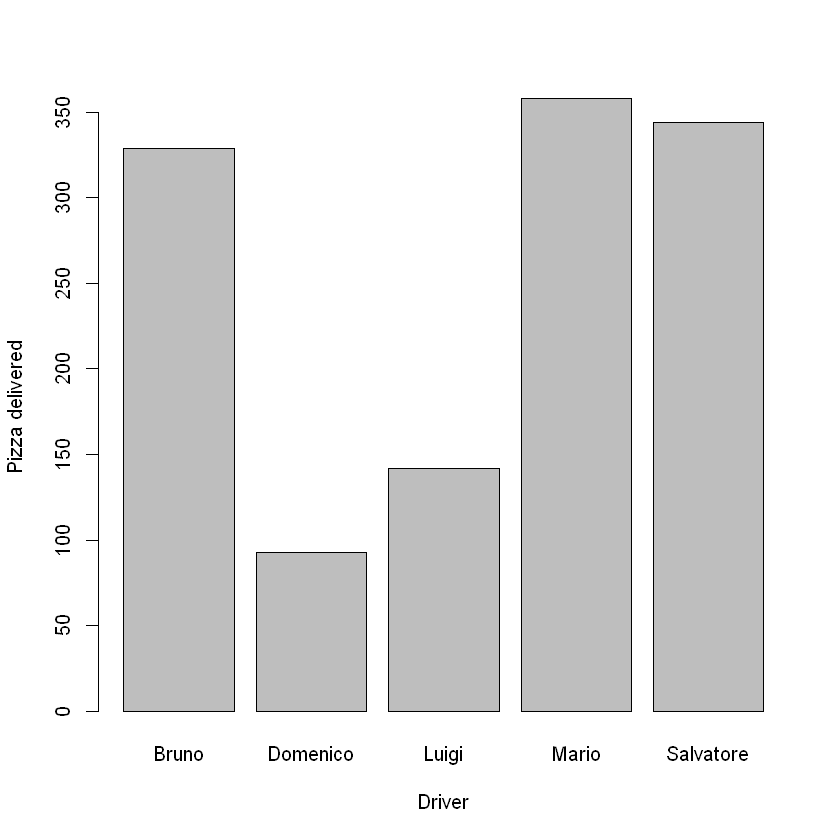

In [22]:
barplot(pizzafreq_by_driver, xlab='Driver', ylab='Pizza delivered')

From the above result we can clearly see that Mario has deliverd maximum number of pizzas and Domenico has delivered minimum number of pizzas. from this result we can coclude who is performing better and who is not.

**Task: 3 plotting the frequency of time of delivery of pizza**

 Now another question comes that what is the time in which most of the pizzas are delivered.
 
 `Note`: Since time is a continuous variable so we can not plot a barplot on this type of data so we need to use histogram which can automatically divide the values in a class intervel which is more readable.

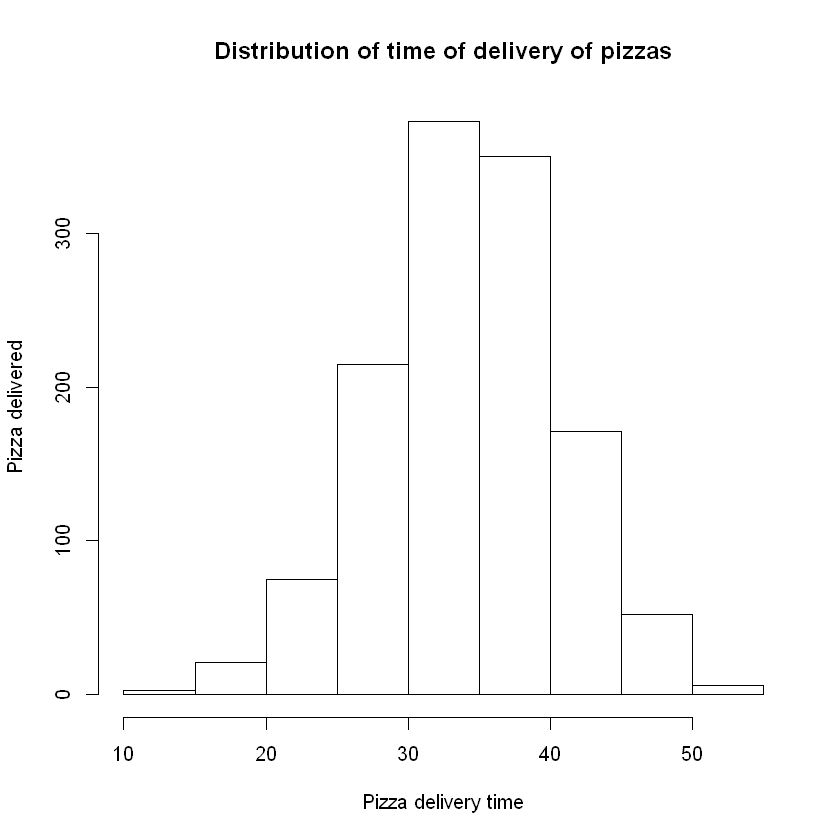

In [29]:
# plotting a histogram by using hist function.
hist(pizzadata$time, xlab='Pizza delivery time', ylab='Pizza delivered', main='Distribution of time of delivery of pizzas')

As we can see that above hist graph can easily tell us that most of the pizza delivery time is in b/w 30-40 minuts. we can get a more precious result if we breaks theser bar into more bar then we can get a more accurate result.

We can use more number of vbars by specifying `breaks=n` parameter in the hist function.

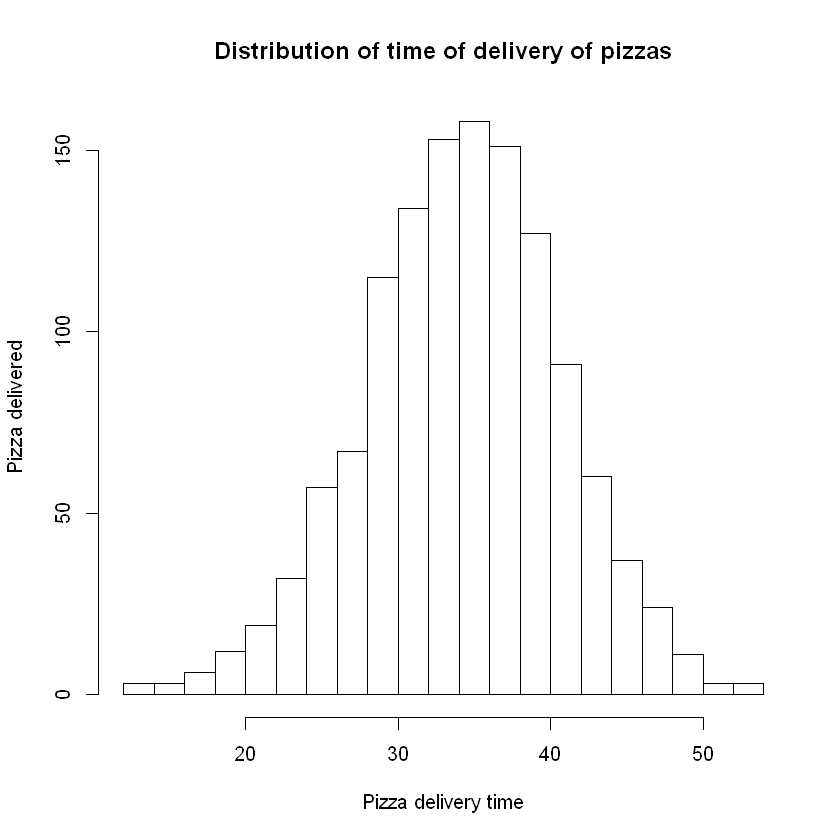

In [30]:
# Now we will use breaks = 20 bars, which will help us to see a more accurate result.
hist(pizzadata$time,breaks=20,xlab='Pizza delivery time', ylab='Pizza delivered', main='Distribution of time of delivery of pizzas')

From the above result we can see that average pizzas delivery time or we can say that usaully most of the time pizzas are delivered in 35 minuts (approximate.), which can be seen by checking the mean of the delivery time. 

Now we will compute the mean of the delivery time and we will plot that mean time line on the graph.

In [32]:
pizzmeantime = mean(pizzadata$time)

pizzmeantime

[1] 34.22955

Now we will plot this mean value on the above graph.

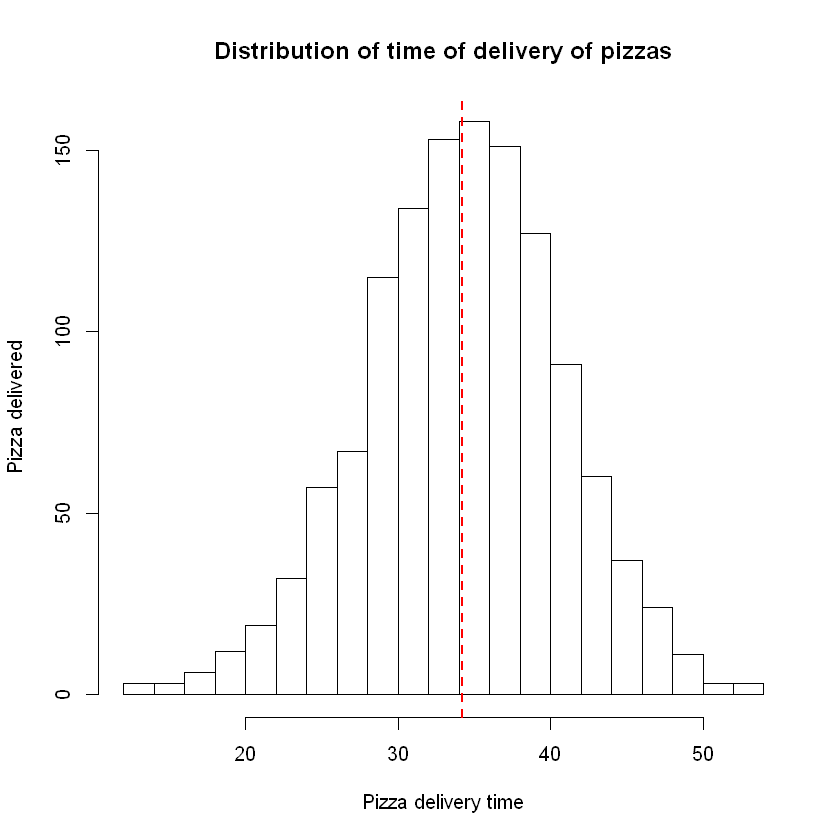

In [42]:
hist(pizzadata$time,breaks=20,xlab='Pizza delivery time', ylab='Pizza delivered', main='Distribution of time of delivery of pizzas')
abline(a=1,b=-1, v=pizzmeantime, lty=2, col=2, lwd=2)

### Kernel Density Plots

A disadvantage of histogram is that continuous data is categorized artifically. The choice of the intervals in crucial for the final look of the graph. A more elegant way to deal with this problem is to smooth the histogram in the sense that each obervation may contribute to different classes with different weights, and the distribution is represented by a continous function rather than a step function.

**Kernel Density Fucntion**
## $$\hat f{(x) = }\frac {1}{nh}\Sigma_{i=1}^{j}  {K (\frac{x-x_i}{h})}$$

Where K is the kernel function.

### $${K(x)} = \frac{3}{4}{(1-x^2)} , \\for |x| < 1  , 0 - elsewhere $$ 

Now we will see the density function details by using `?desnity`

In [44]:
?density

density {stats},R Documentation
x,the data from which the estimate is to be computed. For the default method a numeric vector: long vectors are not supported.
bw,"the smoothing bandwidth to be used. The kernels are scaled such that this is the standard deviation of the smoothing kernel. (Note this differs from the reference books cited below, and from S-PLUS.) bw can also be a character string giving a rule to choose the bandwidth. See bw.nrd. The default, ""nrd0"", has remained the default for historical and compatibility reasons, rather than as a general recommendation, where e.g., ""SJ"" would rather fit, see also Venables and Ripley (2002). The specified (or computed) value of bw is multiplied by adjust."
adjust,the bandwidth used is actually adjust*bw. This makes it easy to specify values like ‘half the default’ bandwidth.
"kernel, window","a character string giving the smoothing kernel to be used. This must partially match one of ""gaussian"", ""rectangular"", ""triangular"", ""epanechnikov"", ""biweight"", ""cosine"" or ""optcosine"", with default ""gaussian"", and may be abbreviated to a unique prefix (single letter). ""cosine"" is smoother than ""optcosine"", which is the usual ‘cosine’ kernel in the literature and almost MSE-efficient. However, ""cosine"" is the version used by S."
weights,"numeric vector of non-negative observation weights, hence of same length as x. The default NULL is equivalent to weights = rep(1/nx, nx) where nx is the length of (the finite entries of) x[]."
width,"this exists for compatibility with S; if given, and bw is not, will set bw to width if this is a character string, or to a kernel-dependent multiple of width if this is numeric."
give.Rkern,"logical; if true, no density is estimated, and the ‘canonical bandwidth’ of the chosen kernel is returned instead."
n,"the number of equally spaced points at which the density is to be estimated. When n > 512, it is rounded up to a power of 2 during the calculations (as fft is used) and the final result is interpolated by approx. So it almost always makes sense to specify n as a power of two."
"from,to",the left and right-most points of the grid at which the density is to be estimated; the defaults are cut * bw outside of range(x).
cut,"by default, the values of from and to are cut bandwidths beyond the extremes of the data. This allows the estimated density to drop to approximately zero at the extremes."


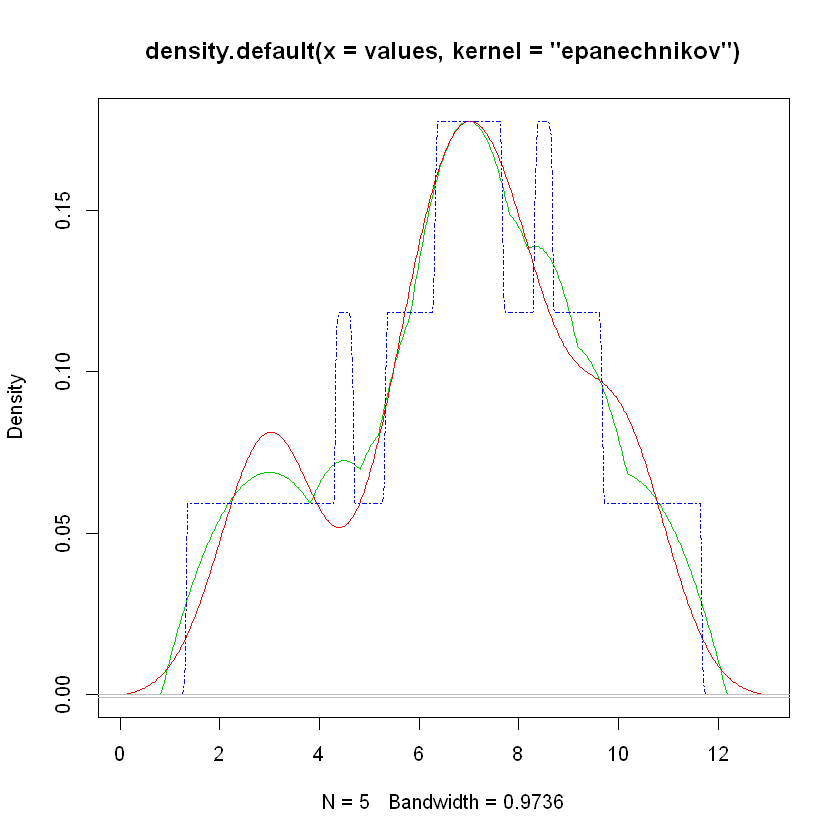

In [78]:
# Now we will plot some density kernel plots by using some values.

values = c(3, 6, 7, 8, 10)

plot(density(values, kernel='epanechnikov') , col=3)
par(new=T)
plot(density(values, kernel='gaussian') ,axes=F, xlab='', ylab='', main='', col=2)
par(new=T)
plot(density(values, kernel='rectangular') ,axes=F, xlab='', ylab='', main='', col=4, lty=4)

#plot(density(c(1,2)),  axes=F, xlab='', ylab='', main='')

Now we will plot the kernel density function by using the our pizza delivery time data, by using this kernel density we can see the distribution function of the delivery time.

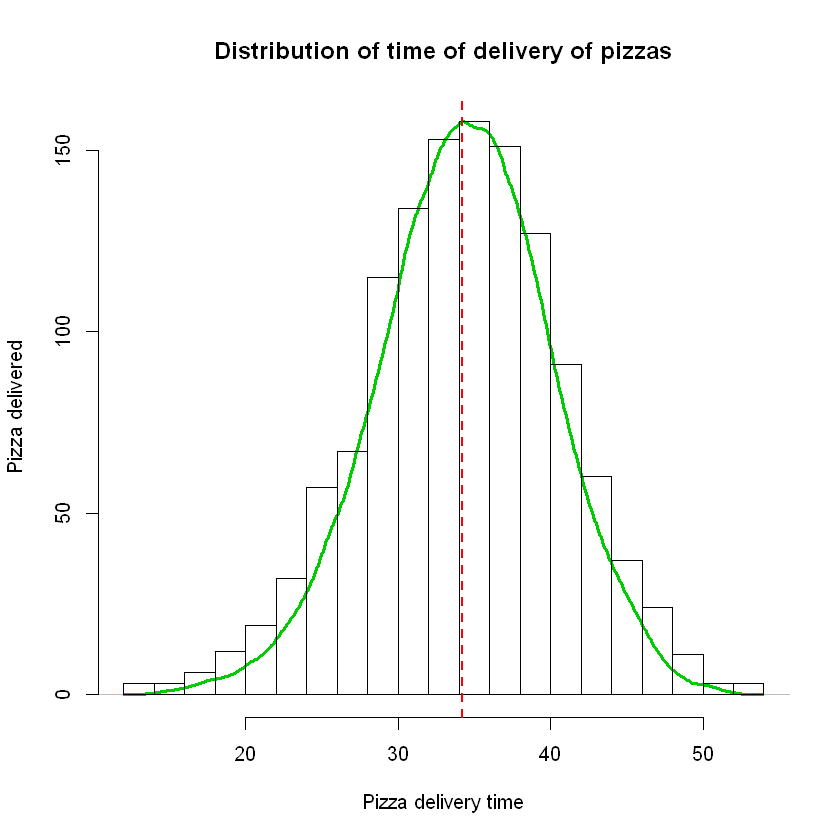

In [65]:
plot(density(pizzadata$time, kernel='epanechnikov'), col=3, main='', lwd=3, axes=FALSE, xlab='', ylab='')
par(new=T)
hist(pizzadata$time,breaks=20,xlab='Pizza delivery time', ylab='Pizza delivered', main='Distribution of time of delivery of pizzas')
abline(a=1,b=-1, v=pizzmeantime, lty=2, col=2, lwd=2)

As we can see that we have a nice smooth distribution curve this curve can be different smoothness on different kernels. in this graph we have used epanechnikov kernel function. we have many other kernel function which can be seen on the density function documentation.

Now we will plot a kernel density function on the 